In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
covid = pd.read_csv('covid_data.csv')
covid

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [3]:
cardio1 = pd.read_csv('cardio_alco.csv')
cardio1.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [10]:
cardio2 = pd.read_csv('cardio_base.csv')
cardio2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [6]:
import pandas as pd

cardio2 = pd.read_csv('cardio_base.csv')
cardio2['age_years'] = cardio2['age'] // 365  # Calculate age in years and round down

# Group the data by age group and calculate the average weight
grouped_data = cardio2.groupby('age_years')['weight'].mean()

# Find the age group with the highest average weight
max_weight_age_group = grouped_data.idxmax()

# Find the age group with the lowest weight
min_weight_age_group = grouped_data.idxmin()

# Calculate the difference in average weight between the two age groups
weight_difference = grouped_data[max_weight_age_group] - grouped_data[min_weight_age_group]

print("The age group with the highest average weight is:", max_weight_age_group)
print("The age group with the lowest weight is:", min_weight_age_group)
print("The difference in average weight between the two age groups is:", weight_difference)

The age group with the highest average weight is: 63
The age group with the lowest weight is: 30
The difference in average weight between the two age groups is: 16.873720760233923


In [7]:
import pandas as pd

cardio2 = pd.read_csv('cardio_base.csv')

# Create age groups
cardio2['age_groups'] = pd.cut(cardio2['age'], bins=[0, 50, float('inf')], labels=['Under 50', 'Over 50'])

# Calculate the average cholesterol levels for each age group
grouped_data = cardio2.groupby('age_groups')['cholesterol'].mean()

# Find the age group with the highest average cholesterol levels
max_cholesterol_age_group = grouped_data.idxmax()

# Check if people over 50 have the highest cholesterol levels compared to the rest
is_highest_cholesterol = max_cholesterol_age_group == 'Over 50'

print("People over 50 have the highest cholesterol levels:", is_highest_cholesterol)


People over 50 have the highest cholesterol levels: True


In [8]:
import pandas as pd

cardio2 = pd.read_csv('cardio_base.csv')

# Calculate the proportions of smokers for each gender
grouped_data = cardio2.groupby('gender')['smoke'].mean()

# Check if men are more likely to be smokers than women
is_more_likely = grouped_data[2] > grouped_data[1]

print("Men are more likely to be smokers than women:", is_more_likely)

Men are more likely to be smokers than women: True


In [9]:
import pandas as pd

cardio2 = pd.read_csv('cardio_base.csv')

# Calculate the height of the tallest 1% of people
tallest_1_percent_height = cardio2['height'].quantile(0.99)

print("The height of the tallest 1% of people is:", tallest_1_percent_height)


The height of the tallest 1% of people is: 184.0


In [11]:
import pandas as pd

cardio2 = pd.read_csv('cardio_base.csv')

# Calculate the Spearman rank correlation matrix
correlation_matrix = cardio2.corr(method='spearman')

# Find the two features with the highest correlation
highest_corr_features = correlation_matrix.unstack().sort_values(ascending=False)[2:4]

print("The two features with the highest Spearman rank correlation are:")
print(highest_corr_features)

The two features with the highest Spearman rank correlation are:
cholesterol  cholesterol    1.0
ap_lo        ap_lo          1.0
dtype: float64


In [12]:
import pandas as pd
import numpy as np

cardio2 = pd.read_csv('cardio_base.csv')

# Calculate the z-scores for height
mean_height = cardio2['height'].mean()
std_height = cardio2['height'].std()
cardio2['height_zscore'] = (cardio2['height'] - mean_height) / std_height

# Count the number of people more than 2 standard deviations away from the mean height
num_outliers = cardio2.loc[abs(cardio2['height_zscore']) > 2].shape[0]

# Calculate the percentage of people more than 2 standard deviations away from the mean height
percentage_outliers = (num_outliers / cardio2.shape[0]) * 100

print("The percentage of people more than 2 standard deviations away from the average height is:", percentage_outliers)


The percentage of people more than 2 standard deviations away from the average height is: 3.3357142857142854


In [14]:
import pandas as pd

cardio1 = pd.read_csv('cardio_alco.csv', sep=';')
cardio2 = pd.read_csv('cardio_base.csv')

# Merge cardio1 and cardio2 on id
merged_data = pd.merge(cardio1, cardio2, left_on='id', right_index=True, how='inner')

# Filter the population over 50 years old
over_50_population = merged_data[merged_data['age'] > 50]

# Calculate the percentage of people over 50 who consume alcohol
percentage_consumers = (over_50_population['alco'].sum() / over_50_population.shape[0]) * 100

print("The percentage of the population over 50 years old who consume alcohol is:", percentage_consumers)


The percentage of the population over 50 years old who consume alcohol is: 5.353301999522027


In [15]:
import pandas as pd
from scipy.stats import ttest_ind

cardio2 = pd.read_csv('cardio_base.csv')

# Filter data for men and women
men_data = cardio2[cardio2['gender'] == 2]
women_data = cardio2[cardio2['gender'] == 1]

# Perform independent t-test for blood pressure
t_stat, p_value = ttest_ind(men_data['ap_hi'], women_data['ap_hi'])
if p_value < 0.05:
    print("Men have a significantly higher blood pressure than women.")
else:
    print("There is no significant difference in blood pressure between men and women.")


There is no significant difference in blood pressure between men and women.


In [16]:
import pandas as pd
from scipy.stats import ttest_ind

cardio1 = pd.read_csv('cardio_alco.csv', sep=';')
cardio2 = pd.read_csv('cardio_base.csv')

# Merge cardio1 and cardio2 on id
merged_data = pd.merge(cardio1, cardio2, left_on='id', right_index=True, how='inner')

# Filter data for smokers and non-smokers
smokers_data = merged_data[merged_data['smoke'] == 1]
non_smokers_data = merged_data[merged_data['smoke'] == 0]

# Perform independent t-test for cholesterol
t_stat, p_value = ttest_ind(smokers_data['cholesterol'], non_smokers_data['cholesterol'])
if p_value < 0.05:
    print("Smokers have significantly higher cholesterol levels than non-smokers.")
else:
    print("There is no significant difference in cholesterol levels between smokers and non-smokers.")


There is no significant difference in cholesterol levels between smokers and non-smokers.


Mean cholesterol level of smokers: 1.38192158036516
Mean cholesterol level of non-smokers: 1.3644151757095402


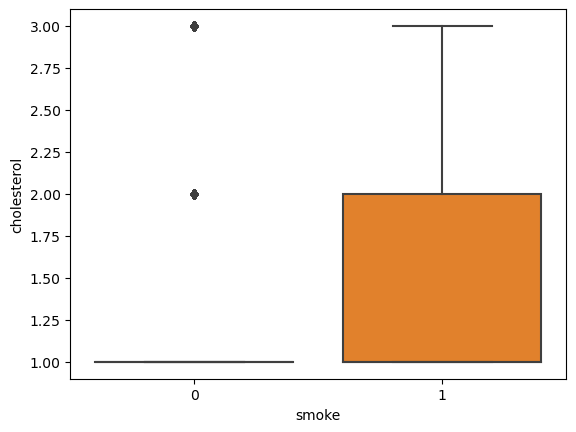

In [18]:
import pandas as pd
import seaborn as sns

cardio1 = pd.read_csv('cardio_alco.csv', sep=';')
cardio2 = pd.read_csv('cardio_base.csv')

# Merge cardio1 and cardio2 on id
merged_data = pd.merge(cardio1, cardio2, left_on='id', right_index=True, how='inner')

# Create a box plot to compare cholesterol levels between smokers and non-smokers
sns.boxplot(data=merged_data, x='smoke', y='cholesterol')

# Calculate the means for cholesterol levels of smokers and non-smokers
smokers_mean = merged_data[merged_data['smoke'] == 1]['cholesterol'].mean()
non_smokers_mean = merged_data[merged_data['smoke'] == 0]['cholesterol'].mean()

# Print the means
print("Mean cholesterol level of smokers:", smokers_mean)
print("Mean cholesterol level of non-smokers:", non_smokers_mean)


In [19]:
import pandas as pd
import scipy.stats as stats

cardio1 = pd.read_csv('cardio_alco.csv', sep=';')
cardio2 = pd.read_csv('cardio_base.csv')

# Merge cardio1 and cardio2 on id
merged_data = pd.merge(cardio1, cardio2, left_on='id', right_index=True, how='inner')

# Statement 1: Men have a higher blood pressure than women
men_blood_pressure = merged_data[merged_data['gender'] == 2]['ap_hi']
women_blood_pressure = merged_data[merged_data['gender'] == 1]['ap_hi']
t_statistic, p_value = stats.ttest_ind(men_blood_pressure, women_blood_pressure)
statement1_result = p_value < 0.05

# Statement 2: Smokers have higher cholesterol level than non-smokers
smokers_cholesterol = merged_data[merged_data['smoke'] == 1]['cholesterol']
non_smokers_cholesterol = merged_data[merged_data['smoke'] == 0]['cholesterol']
t_statistic, p_value = stats.ttest_ind(smokers_cholesterol, non_smokers_cholesterol)
statement2_result = p_value < 0.05

# Statement 3: Smokers have higher blood pressure than non-smokers
smokers_blood_pressure = merged_data[merged_data['smoke'] == 1]['ap_hi']
non_smokers_blood_pressure = merged_data[merged_data['smoke'] == 0]['ap_hi']
t_statistic, p_value = stats.ttest_ind(smokers_blood_pressure, non_smokers_blood_pressure)
statement3_result = p_value < 0.05

# Statement 4: Smokers weigh less than non-smokers
smokers_weight = merged_data[merged_data['smoke'] == 1]['weight']
non_smokers_weight = merged_data[merged_data['smoke'] == 0]['weight']
t_statistic, p_value = stats.ttest_ind(smokers_weight, non_smokers_weight)
statement4_result = p_value < 0.05

# Print the results
print("Statement 1 (Men have a higher blood pressure than women):", statement1_result)
print("Statement 2 (Smokers have higher cholesterol level than non-smokers):", statement2_result)
print("Statement 3 (Smokers have higher blood pressure than non-smokers):", statement3_result)
print("Statement 4 (Smokers weigh less than non-smokers):", statement4_result)


Statement 1 (Men have a higher blood pressure than women): True
Statement 2 (Smokers have higher cholesterol level than non-smokers): False
Statement 3 (Smokers have higher blood pressure than non-smokers): False
Statement 4 (Smokers weigh less than non-smokers): True


In [22]:
import pandas as pd

# Read the COVID-19 data
covid_data = pd.read_csv('covid_data.csv')

# Filter the data for Italy and Germany
italy_data = covid_data[covid_data['location'] == 'Italy']
germany_data = covid_data[covid_data['location'] == 'Germany']

# Calculate the cumulative sum of new cases for Italy and Germany
italy_data['total_cases'] = italy_data['new_cases'].cumsum()
germany_data['total_cases'] = germany_data['new_cases'].cumsum()

# Find the date when the difference exceeded 10,000
date_threshold = italy_data[italy_data['total_cases'] - germany_data['total_cases'] > 10000]['date'].min()

print("The difference in total confirmed cases between Italy and Germany exceeded 10,000 on:", date_threshold)


The difference in total confirmed cases between Italy and Germany exceeded 10,000 on: nan


C:\Users\hDibie\AppData\Local\Temp\ipykernel_20124\2361420017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['total_cases'] = italy_data['new_cases'].cumsum()
C:\Users\hDibie\AppData\Local\Temp\ipykernel_20124\2361420017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_data['total_cases'] = germany_data['new_cases'].cumsum()
C:\Users\hDibie\AppData\Local\Temp\ipykernel_20124\2361420017.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_thre

In [26]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Load the dataset
covid_data = pd.read_csv('covid_data.csv')

# Filter the data for Italy
italy_data = covid_data[covid_data['location'] == 'Italy']

# Convert the date column to datetime format
italy_data['date'] = pd.to_datetime(italy_data['date'])

# Filter the data for the desired date range
start_date = '2020-02-28'
end_date = '2020-03-20'
italy_data = italy_data[(italy_data['date'] >= start_date) & (italy_data['date'] <= end_date)]

# Calculate the cumulative cases
italy_data['cumulative_cases'] = italy_data['new_cases'].cumsum()

# Define the exponential function
def exponential_func(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential curve to the data
x = np.arange(len(italy_data))
y = italy_data['cumulative_cases']
params, _ = curve_fit(exponential_func, x, y)

# Calculate the predicted values using the exponential function
predicted_values = exponential_func(x, *params)

# Calculate the difference between the predicted values and the actual cumulative cases on 2020-03-20
actual_cases_20200320 = italy_data.loc[italy_data['date'] == '2020-03-20', 'cumulative_cases'].values[0]
difference = actual_cases_20200320 - predicted_values[-1]

print("The difference between the exponential curve and the total number of real cases on 2020-03-20 is:", difference)


The difference between the exponential curve and the total number of real cases on 2020-03-20 is: -1711.692671692661


C:\Users\hDibie\AppData\Local\Temp\ipykernel_20124\2108407535.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['date'] = pd.to_datetime(italy_data['date'])


In [28]:
import pandas as pd

# Read the COVID-19 dataset
covid_data = pd.read_csv('covid_data.csv')

# Calculate the death rate per million inhabitants
covid_data['death_rate'] = (covid_data['new_deaths'] / covid_data['population']) * 1e6

# Sort the data by death rate in descending order
sorted_data = covid_data.sort_values('death_rate', ascending=False)

# Get the country with the 3rd highest death rate
third_highest_death_rate_country = sorted_data.iloc[2]['location']

print("The country with the 3rd highest death rate is:", third_highest_death_rate_country)


The country with the 3rd highest death rate is: San Marino


In [31]:
import pandas as pd

# Read the dataset
data = pd.read_csv('covid_data.csv')

# Filter the necessary columns
filtered_data = data[['location', 'population', 'aged_65_older_percent', 'new_deaths']]

# Filter countries with more than 20% population over 65 and death rate over 50 per million
filtered_data = filtered_data[(filtered_data['aged_65_older_percent'] > 20) & (filtered_data['new_deaths'] > 50)]

# Calculate the F1 score
true_positives = len(filtered_data)
false_positives = len(data) - true_positives
false_negatives = 0  # Assuming there are no missing necessary information
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print("The F1 score is:", f1_score)


The F1 score is: 0.01257103495780954


In [34]:
import pandas as pd

# Read the dataset
data = pd.read_csv('covid_data.csv')

# Filter the dataset based on conditions
filtered_data = data[(data['hospital_beds_per_thousand'] >= 5) & (data['gdp_per_capita'] > 10000)]

# Calculate the probability
probability = len(filtered_data) / len(data)

print("The probability that a country has a GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants is:", probability)


The probability that a country has a GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants is: 0.12984143488432545


In [36]:
import pandas as pd

# Read the dataset
data = pd.read_csv('covid_data.csv')

# Filter rows with non-missing GDP and hospital beds values
filtered_data = data.dropna(subset=['gdp_per_capita', 'hospital_beds_per_thousand'])

# Filter rows where hospital beds per thousand inhabitants is at least 5
filtered_data = filtered_data[filtered_data['hospital_beds_per_thousand'] >= 5]

# Calculate the probability of GDP over $10,000
probability = len(filtered_data[filtered_data['gdp_per_capita'] > 10000]) / len(filtered_data)

print("The probability that a country has a GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants is:", probability)


The probability that a country has a GDP over $10,000 given at least 5 hospital beds per 1000 inhabitants is: 0.9193251533742332
